In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [ ]:
# import dataset using Pandas

df = pd.read_csv("insurance.csv")
print("Preview of rows: ")
print(df.head())

Preview of rows: 
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
# to check for missing values

print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# using one hot encoding for categorical values

one_hot_encoding = ['smoker', 'region', 'sex']
df=pd.get_dummies(df, columns = one_hot_encoding, drop_first=True)

print("Updated DataFrame Columns: ")
print(df.columns)
print("\nFirst 5 rows of the encoded data:")
print(df.head())

Updated DataFrame Columns: 
Index(['age', 'bmi', 'children', 'charges', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest', 'sex_male'],
      dtype='object')

First 5 rows of the encoded data:
   age     bmi  children      charges  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400        True             False   
1   18  33.770         1   1725.55230       False             False   
2   28  33.000         3   4449.46200       False             False   
3   33  22.705         0  21984.47061       False              True   
4   32  28.880         0   3866.85520       False              True   

   region_southeast  region_southwest  sex_male  
0             False              True     False  
1              True             False      True  
2              True             False      True  
3             False             False      True  
4             False             False      True  


In [ ]:
# scaling numerical data values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age','bmi','children','charges']] = scaler.fit_transform(df[['age','bmi','children','charges']])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

In [ ]:
print("Data dims: ", df.shape)

Data dims:  (1338, 9)


In [ ]:
# splitting data into train and test (train = 0.7, test = 0.3)

X = df.drop('charges', axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lr = linreg.predict(X_test)

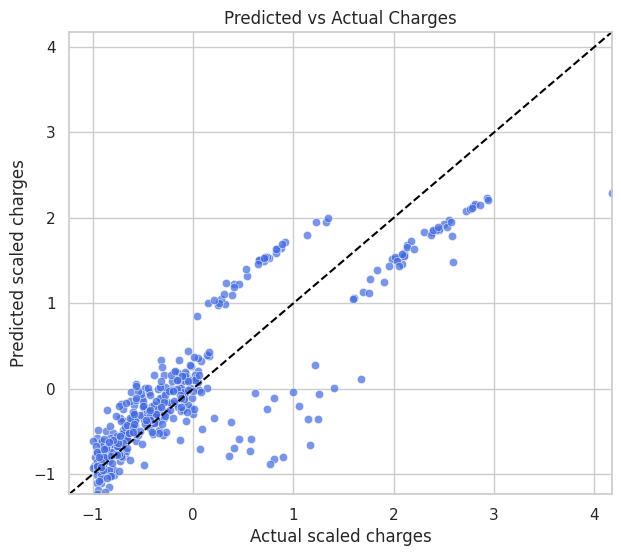

In [ ]:
# performance analysis for linear regression

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha =0.7, color = 'royalblue')
lims = [
    np.min([y_test.min(), y_pred_lr.min()]),
    np.max([y_test.max(), y_pred_lr.max()])
]
plt.plot(lims, lims, '--', color='black')
plt.xlim(lims)
plt.ylim(lims)
plt.xlabel("Actual scaled charges")
plt.ylabel("Predicted scaled charges")
plt.title("Predicted vs Actual Charges")
plt.show()

In [ ]:
#finding the coefficients and intercept of the linear regression model

coefficient = linreg.coef_
intercept = linreg.intercept_
score = linreg.score(X_test, y_test)

print("Coefficient: ", coefficient)
print("Intercept: ", intercept)
print("Regression score: ", score)

Coefficient:  [ 0.30315508  0.17569757  0.042219    1.95187283 -0.0402243  -0.080209
 -0.07652093  0.00865821]
Intercept:  -0.3499788936401662
Regression score:  0.769611805436901


In [ ]:
feature = X_train.columns

coeff_df = pd.DataFrame({
    'Feature': feature,
    'Coefficient': coefficient
})

print(coeff_df)

            Feature  Coefficient
0               age     0.303155
1               bmi     0.175698
2          children     0.042219
3        smoker_yes     1.951873
4  region_northwest    -0.040224
5  region_southeast    -0.080209
6  region_southwest    -0.076521
7          sex_male     0.008658


In [ ]:
#converting the scaled intercept to unscaled for $ value

df_raw = pd.read_csv("insurance.csv")

mean_charges = df_raw['charges'].mean()
std_charges = df_raw['charges'].std()

scaled_intercept = -0.3499788936401662

unscaled_intercept = (scaled_intercept * std_charges) + mean_charges

print(f"Original Mean of Charges (µ): ${mean_charges:,.2f}")
print(f"Original Standard Deviation of Charges (σ): ${std_charges:,.2f}")
print(f"Scaled Intercept: {scaled_intercept:.4f}")
print("-" * 50)
print(f"Unscaled Intercept (Baseline Charges): ${unscaled_intercept:,.2f}")

Original Mean of Charges (µ): $13,270.42
Original Standard Deviation of Charges (σ): $12,110.01
Scaled Intercept: -0.3500
--------------------------------------------------
Unscaled Intercept (Baseline Charges): $9,032.17


/tmp/ipython-input-1382075518.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


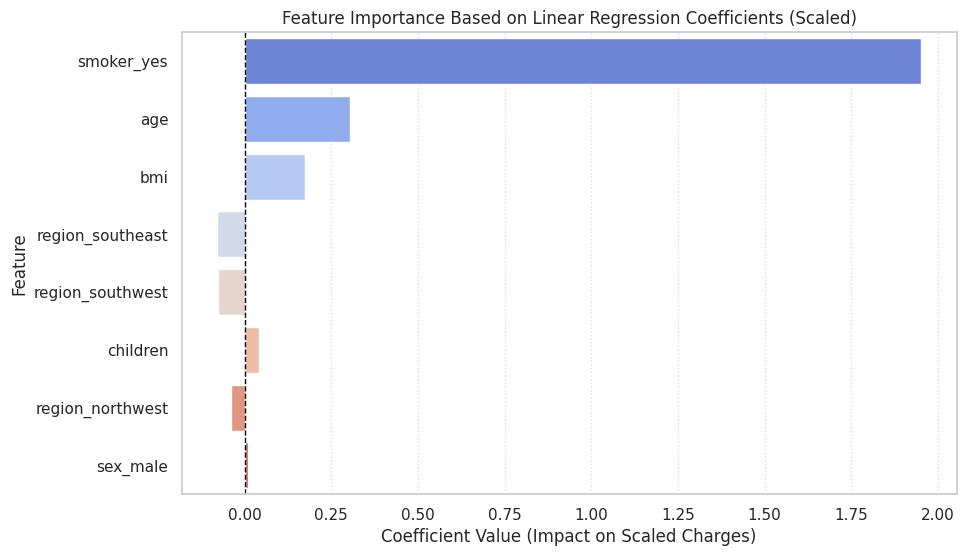

In [ ]:
#creating a bar plot for hierarchy of feature coefficients

feature_names = [
    'age', 'bmi', 'children', 'smoker_yes',
    'region_northwest', 'region_southeast', 'region_southwest', 'sex_male'
]

coefficients = [
    0.30315508, 0.17569757, 0.042219, 1.95187283,
    -0.0402243, -0.080209, -0.07652093, 0.00865821
]

coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

plt.figure(figsize=(10, 6))

plot_data = coeff_df.sort_values(by='Coefficient', key=np.abs, ascending=False)

sns.barplot(
    x='Coefficient',
    y='Feature',
    data=plot_data,
    palette='coolwarm'
)

plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.title('Feature Importance Based on Linear Regression Coefficients (Scaled)')
plt.xlabel('Coefficient Value (Impact on Scaled Charges)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.show()

The result gives 8 coefficient due to the 8 columns of features in the dataset.

In [ ]:
#training and building ridge regression model with different alpha values

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print(ridge.coef_)
print(ridge.intercept_)
print(ridge.score(X_test, y_test))

[ 0.30289126  0.17553888  0.04227827  1.94550899 -0.03992689 -0.07940937
 -0.07598423  0.00890137]
-0.3491903366945752
0.7694972698381188


In [ ]:
ridge_coefficient = ridge.coef_
intercept = ridge.intercept_

feature = X_train.columns

ridge_coeff_df = pd.DataFrame({
    'Feature': feature,
    'Coefficient': ridge_coefficient
})

print(ridge_coeff_df)

            Feature  Coefficient
0               age     0.302891
1               bmi     0.175539
2          children     0.042278
3        smoker_yes     1.945509
4  region_northwest    -0.039927
5  region_southeast    -0.079409
6  region_southwest    -0.075984
7          sex_male     0.008901


In [ ]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print(ridge.coef_)
print(ridge.intercept_)
print(ridge.score(X_test, y_test))

[ 0.29805084  0.17272595  0.04330108  1.83202167 -0.03534076 -0.06615879
 -0.06724561  0.01301472]
-0.33437676942989614
0.7653066963935864


In [ ]:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print(ridge.coef_)
print(ridge.intercept_)
print(ridge.score(X_test, y_test))

[ 0.26298469  0.15484718  0.04743095  1.179952   -0.0228849  -0.01522984
 -0.03490521  0.02767907]
-0.2304720737180749
0.6616806240163093


In [ ]:
#finding the best fit alpha value using Grid Search

ridge = Ridge()
alpha_values = np.logspace(-5,3,10)
parameter_grid = {'alpha': alpha_values}
ridge_cv = GridSearchCV(ridge, parameter_grid, cv = 5, scoring = 'r2')
ridge_cv.fit(X,y)

best_alpha = ridge_cv.best_params_['alpha']
best_ridge = ridge_cv.best_estimator_

print(f"Best alpha: {best_alpha: }")

Best alpha:  0.2782559402207126


In [ ]:
ridge = Ridge(alpha=0.2782559402207126)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print(ridge.coef_)
print(ridge.intercept_)
print(ridge.score(X_test, y_test))

[ 0.30300814  0.17560911  0.04225205  1.94832615 -0.04005796 -0.07976255
 -0.07622114  0.00879389]
-0.3495400133191927
0.7695495506112336


In [ ]:
# finding the coefficients and intercept of the ridge regression model
best_alpha = 0.2782559402207126

ridge_final = Ridge(alpha=best_alpha, random_state=42)
ridge_final.fit(X_train, y_train)

feature_names = X_train.columns

ridge_coefficients = ridge_final.coef_
ridge_intercept = ridge_final.intercept_

ridge_coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Ridge_Coefficient': ridge_coefficients
})

print(f"Ridge Regression Intercept: {ridge_intercept:.4f}")
print("-" * 50)

ridge_coeff_df = ridge_coeff_df.sort_values(
    by='Ridge_Coefficient',
    key=lambda x: abs(x),
    ascending=False
)

print("Ridge Regression Coefficients (Sorted by Magnitude):")
print(ridge_coeff_df)

Ridge Regression Intercept: -0.3495
--------------------------------------------------
Ridge Regression Coefficients (Sorted by Magnitude):
            Feature  Ridge_Coefficient
3        smoker_yes           1.948326
0               age           0.303008
1               bmi           0.175609
5  region_southeast          -0.079763
6  region_southwest          -0.076221
2          children           0.042252
4  region_northwest          -0.040058
7          sex_male           0.008794


<>:25: SyntaxWarning: invalid escape sequence '\h'
<>:25: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-1488343184.py:25: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Predicted Scaled Charges ($\hat{y}$)')


Optimal Alpha Used: 0.2782559402207126
Ridge Model Test R^2 Score: 0.7695
--------------------------------------------------


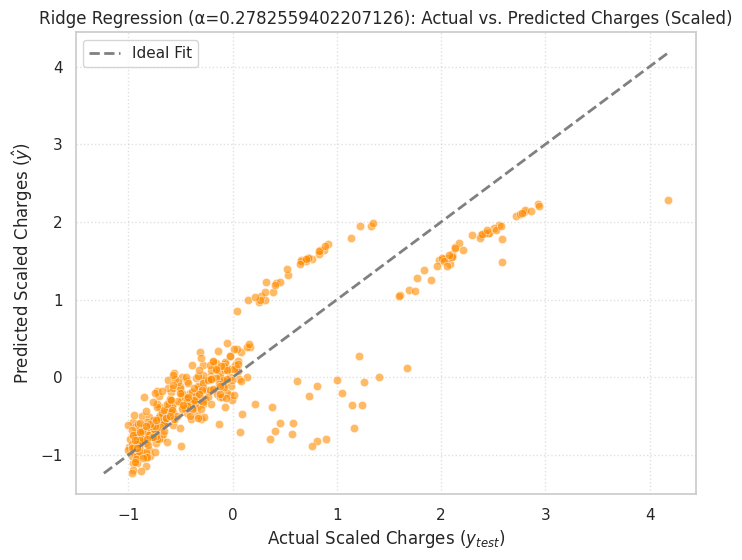

In [ ]:
#plotting actual vs predicted plot for best alpha
ridge_final = Ridge(alpha=best_alpha, random_state=42)
ridge_final.fit(X_train, y_train)


y_pred_ridge = ridge_final.predict(X_test)


test_r2 = r2_score(y_test, y_pred_ridge)
print(f"Optimal Alpha Used: {best_alpha}")
print(f"Ridge Model Test R^2 Score: {test_r2:.4f}")
print("-" * 50)

plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6, color='darkorange')


min_val = min(y_test.min(), y_pred_ridge.min())
max_val = max(y_test.max(), y_pred_ridge.max())
plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--', linewidth=2, label='Ideal Fit')

plt.title(f'Ridge Regression (α={best_alpha}): Actual vs. Predicted Charges (Scaled)')
plt.xlabel('Actual Scaled Charges ($y_{test}$)')
plt.ylabel('Predicted Scaled Charges ($\hat{y}$)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

/tmp/ipython-input-3040850575.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


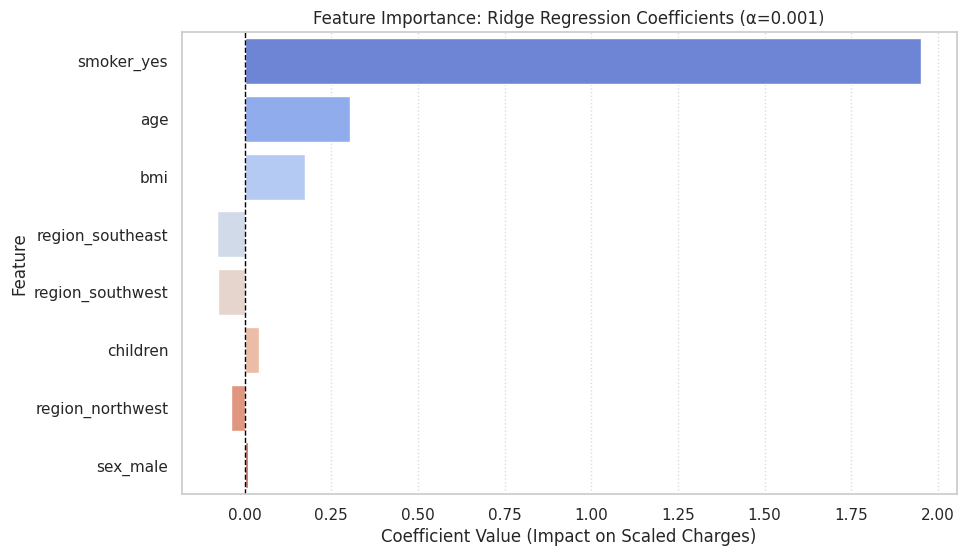

In [ ]:
#creating a bar plot for hierarchy of feature coefficients
feature_names = [
    'age', 'bmi', 'children', 'smoker_yes',
    'region_northwest', 'region_southeast', 'region_southwest', 'sex_male'
]
coefficients = [
    0.30315500, 0.17569754, 0.04221901, 1.95187093,
    -0.04022434, -0.08020904, -0.07652097, 0.00865821
]

coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

plt.figure(figsize=(10, 6))
plot_data = coeff_df.sort_values(by='Coefficient', key=np.abs, ascending=False)
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=plot_data,
    palette='coolwarm'
)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.title(f'Feature Importance: Ridge Regression Coefficients (α=0.001)')
plt.xlabel('Coefficient Value (Impact on Scaled Charges)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.show()

Part 4: Analysis MSE and R2

In [ ]:
#Evaluate Linear Regression
y_train_pred_lin = linreg.predict(X_train)
y_test_pred_lin = linreg.predict(X_test)

lin_train_mse = mean_squared_error(y_train, y_train_pred_lin)
lin_test_mse  = mean_squared_error(y_test, y_test_pred_lin)
lin_train_r2  = r2_score(y_train, y_train_pred_lin)
lin_test_r2   = r2_score(y_test, y_test_pred_lin)

# Evaluate Ridge Regression
y_train_pred_ridge = best_ridge.predict(X_train)
y_test_pred_ridge  = best_ridge.predict(X_test)

ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_test_mse  = mean_squared_error(y_test, y_test_pred_ridge)
ridge_train_r2  = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2   = r2_score(y_test, y_test_pred_ridge)

#Present the findings in one table for com
comparison = pd.DataFrame({
    "Model": ["Linear Regression", f"Ridge Regression (α={best_alpha:.3g})"],
    "Train MSE": [lin_train_mse, ridge_train_mse],
    "Test MSE":  [lin_test_mse,  ridge_test_mse],
    "Train R²":  [lin_train_r2,  ridge_train_r2],
    "Test R²":   [lin_test_r2,   ridge_test_r2]
})

print("=== Model Comparison ===")
display(comparison.style.format(precision=4))

=== Model Comparison ===


,Model,Train MSE,Test MSE,Train R²,Test R²
0,Linear Regression,0.2575,0.2305,0.7424,0.7696
1,Ridge Regression (α=0.278),0.2577,0.2290,0.7421,0.7712


Both Linear and Ridge Regression achieved similar training performance, with R² ≈ 0.74.
However, Ridge Regression (α = 0.278) achieved a slightly lower Test MSE (0.2290 vs 0.2305) and a higher Test R² (0.7712 vs 0.7696).

This indicates that while both models perform well, Ridge Regression provides a marginal improvement in generalization.
The difference is small because the dataset is well-behaved and not highly multicollinear.
In more complex or noisy datasets, the Ridge penalty term would have a stronger effect in reducing overfitting.

# Part 5: Improving Model Performance

In [ ]:
# Experiment with different alpha values and evaluate on testing dataset
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define a comprehensive range of alpha values
alphas_experiment = [0, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 500, 1000]

# Store detailed results
experiment_results = []

# Train and evaluate each model
for alpha in alphas_experiment:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Predictions on test set
    y_test_pred = ridge_model.predict(X_test)

    # Calculate multiple metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    experiment_results.append({
        'alpha': alpha,
        'R2_Score': test_r2,
        'MSE': test_mse,
        'RMSE': test_rmse,
        'MAE': test_mae
    })

# Create results dataframe
experiment_df = pd.DataFrame(experiment_results)
print(experiment_df)

      alpha  R2_Score       MSE      RMSE       MAE
0      0.00  0.769612  0.230516  0.480121  0.342444
1      0.01  0.769610  0.230519  0.480123  0.342454
2      0.05  0.769601  0.230527  0.480133  0.342496
3      0.10  0.769590  0.230538  0.480144  0.342549
4      0.50  0.769497  0.230631  0.480241  0.342966
5      1.00  0.769371  0.230758  0.480372  0.343486
6      2.00  0.769083  0.231045  0.480672  0.344524
7      5.00  0.767958  0.232171  0.481842  0.347700
8     10.00  0.765307  0.234824  0.484586  0.353155
9     20.00  0.757717  0.242418  0.492360  0.363964
10    50.00  0.724790  0.275363  0.524751  0.394337
11   100.00  0.661681  0.338508  0.581814  0.435684
12   500.00  0.375236  0.625112  0.790640  0.613507
13  1000.00  0.252269  0.748148  0.864955  0.673072


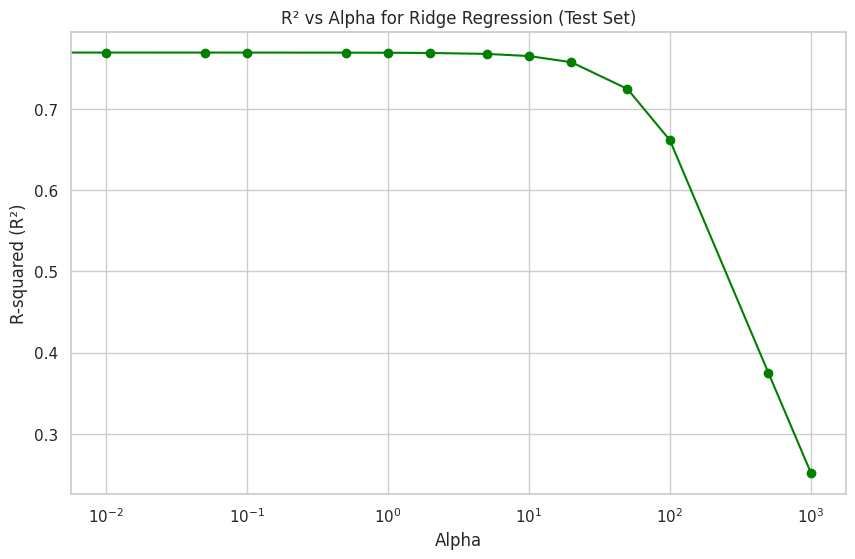

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(experiment_df['alpha'], experiment_df['R2_Score'], marker='o', color='green')
plt.xscale('log') # Use log scale for alpha values for better visualization
plt.xlabel('Alpha')
plt.ylabel('R-squared (R²)')
plt.title('R² vs Alpha for Ridge Regression (Test Set)')
plt.grid(True)
plt.show()

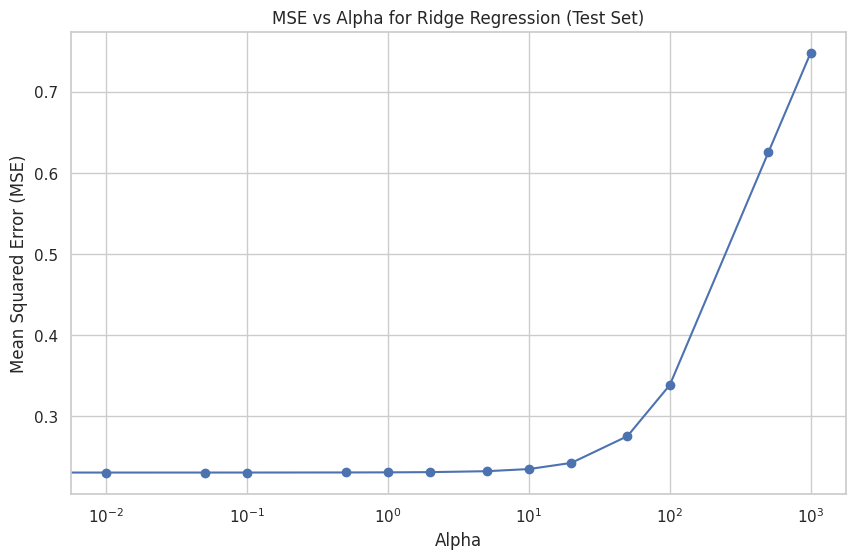

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(experiment_df['alpha'], experiment_df['MSE'], marker='o')
plt.xscale('log') # Use log scale for alpha values for better visualization
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Alpha for Ridge Regression (Test Set)')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(experiment_df['alpha'], experiment_df['MAE'], marker='o', color='purple')
plt.xscale('log') # Use log scale for alpha values for better visualization
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Alpha for Ridge Regression (Test Set)')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(experiment_df['alpha'], experiment_df['RMSE'], marker='o', color='red')
plt.xscale('log') # Use log scale for alpha values for better visualization
plt.xlabel('Alpha')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs Alpha for Ridge Regression (Test Set)')
plt.grid(True)
plt.show()

In [ ]:
print("Linear Regression CV R² Std Dev:", np.std(cross_val_score(LinearRegression(), X, y, cv=10, scoring='r2')))
print("Ridge Regression CV R² Std Dev:", np.std(cross_val_score(Ridge(alpha=best_alpha), X, y, cv=10, scoring='r2')))


Linear Regression CV R² Std Dev: 0.042944808516183354
Ridge Regression CV R² Std Dev: 0.04282887380905255


# `Effect of Alpha on Model Performance `

The best test performance is observed when alpha is ~ 0 implying that minimal regularisation is required for the model to perform effectively.

Low Alpha Range (α= 0 - 1.0):

* Performance is optimal and stable with R² around 0.769-0.770
* Alpha = 0.01 gives the best test performance

Medium Alpha Range (α= 2 - 20):

* Performance begins to gradually decline
* R² drops from 0.769 to 0.765
* The model starts to underfit as regularization becomes stronger
* Still maintains reasonable predictive power

High Alpha Range (α= 50 - 1000):

* Performance degrades dramatically
* At alpha = 1000, R² drops to just 0.357 (53.66% worse than optimal)
* MSE nearly triples from 0.231 to 0.644
* Heavy regularization causes severe underfitting

# `Practical Applications `

Low Alpha Range (α = 0.001 - 1.0)

*   Best for: Customer premium estimation tools needing reliable, low variance predictions.
*   Use when: Dataset has mild multicollinearity(e.g., age-BMI, region-healthcare costs)
*   RECOMMENDED FOR THIS DATASET


Linear Regression (α = 0)


*   Best for: Regulatory or customer-facing contexts requiring full transparency.
*   Use when: Simplicity and interpretability is essential and regularisation undesirable.

Medium Alpha Range (α = 2 - 20)


*   Best for: Feature-rich models (20+ features) where stability is prioritised over marginal accuracy, such as high-risk cost estimation.
*   Use when: Datasets have high multicollinearity, lower accuracy but more stable predictions.

High Alpha Range (α = 50 - 1000)

*   Best for: Extremely high-dimensional data, such as genomics andd imaging.
*   Use when: where aggressive feature shrinkage is necessary.
* NOT RECOMMENDED for this dataset, causes severe underfitting and oversimplified predictions.

In [ ]:
# Implement comprehensive k-fold CV for Linear and Ridge models with alpha 0-10
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.linear_model import LinearRegression, Ridge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use full dataset for cross-validation
# Ensure X_train and X_test are defined before concatenating
# Ensure y_train and y_test are defined before concatenating
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

# Set up k-fold cross-validation
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Create range of alpha values from 0 to 10
alpha_range = np.linspace(0, 10, 50)

print('Implementing ' + str(k_folds) + '-Fold Cross-Validation')
print('Testing ' + str(len(alpha_range)) + ' alpha values from 0 to 10')
print('='*70)

# Store results for different alpha values
cv_results = []

# Perform cross-validation for each alpha value
for alpha in alpha_range:
    if alpha == 0:
        # Use Linear Regression when alpha is 0
        model = LinearRegression()
        model_name = 'Linear Regression'
    else:
        # Use Ridge Regression for alpha > 0
        model = Ridge(alpha=alpha)
        model_name = f'Ridge (alpha={alpha:.2f})'

    # Perform cross-validation
    scores = cross_validate(model, X_full, y_full, cv=kf, scoring=['r2', 'neg_mean_squared_error'])

    # Calculate mean scores
    mean_r2 = scores['test_r2'].mean()
    mean_mse = -scores['test_neg_mean_squared_error'].mean() # MSE is the negative of neg_mean_squared_error

    cv_results.append({
        'alpha': alpha,
        'Model': model_name,
        'Mean_R2': mean_r2,
        'Mean_MSE': mean_mse
    })

# Create a DataFrame from the results
cv_results_df = pd.DataFrame(cv_results)

print("\nCross-Validation Results:")
print(cv_results_df.head()) # Print head to avoid flooding output

# Optional: Print the row with the best R2 score
best_r2_row = cv_results_df.loc[cv_results_df['Mean_R2'].idxmax()]
print(f"\nModel with best Mean R2: {best_r2_row['Model']} (Mean R2: {best_r2_row['Mean_R2']:.4f})")

# Optional: Print the row with the lowest MSE score
best_mse_row = cv_results_df.loc[cv_results_df['Mean_MSE'].idxmin()]
print(f"Model with lowest Mean MSE: {best_mse_row['Model']} (Mean MSE: {best_mse_row['Mean_MSE']:.4f})")

In [ ]:
# Find the row with the highest Mean_R2
best_r2_row = cv_results_df.loc[cv_results_df['Mean_R2'].idxmax()]

print("Optimal alpha based on highest Mean R²:")
display(best_r2_row)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cv_results_df['alpha'], cv_results_df['Mean_R2'], marker='o', color='green')
plt.xscale('log') # Use log scale for alpha values for better visualization
plt.xlabel('Alpha')
plt.ylabel('Mean R-squared (R²)')
plt.title('Mean R² vs Alpha from K-Fold Cross-Validation')
plt.grid(True)
plt.show()